# Explore

## Where we are living currently:
    - We have done so far:
    - Planning:
        - Establishing what we want to know about our data (in general)
    - Acquisition:
        - How we extract and examine our data initially
        - How we make the process of getting the data speedy, replicable, and reliable
    - Prep:
        - Examining all the features on a univariate level
        - Examining the data for any corruption, redundancy, or incongruence
        - executing the changes desired from the observed shortcoming mentioned above
        - How we make that process replicable, modular, and reliable

### Exploration:


 - What can we say about the data now that we have it in proper working condition?

 - Steps in this process:

1. Univariate Exploration
 - visualizations (distributive)
2. Bivariate Exploration
 - visualizations (comparative)
 - statistical testing
3. Multivariate Exploration
 - visualizations(comparative)
 - statistical testing
 - clues for feature engineering

In [1]:
# within these steps:
# What do we want to know about the data in this context?
# What specific question can we ask?
# I that specific question something that we can translate
# into a stats test/ null+alt hypothesis?
# Does this question relate to the outcome that we want to
# predict with our data?

Objective at the end of this phase:
- we will have a train, validate, and test set as we did before
- we may or may not have the desire to add in new feature engineering or transformative processes to our original training set (which would require a new edit to the preprocessing phase of our prepare script)
- we *will* have concrete observations that we have made based on *strictly* the training set within our exploratory data analysis.
- The concrete observations that we make will allow us to select the most consequential features and variables to begin assessing with our predictive modeling as we go into the modeling phase of the pipeline

In [7]:
# tabular data
import numpy as np
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# stats testing
from scipy import stats
# custom acquire script
from acquire import get_titanic_data
# from prepare import prepare_titanic_data
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.impute import SimpleImputer

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def split_titanic_data(df, target='survived'):
    '''
    split titanic data will split data based on 
    the values present in a cleaned version of titanic
    that is from clean_titanic
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349,
                                   stratify=train_val[target])
    return train, validate, test

In [6]:
def clean_titanic(df):
    '''
    clean titanic will take in a single pandas dataframe
    and will proceed to drop redundant columns
    and nonuseful information
    in addition to addressing null values
    and encoding categorical variables
    '''
    #drop out any redundant, excessively empty, or bad columns
    df = df.drop(columns=['passenger_id','embarked','deck','class'])
    # impute average age and most common embark_town:
    train, validate, test = split_titanic_data(df)
    my_age_imputer = SimpleImputer(strategy='mean')
    my_age_imputer.fit(train[['age']])
    train.loc[:,'age'] = my_age_imputer.transform(train[['age']])
    validate.loc[:,'age'] = my_age_imputer.transform(validate[['age']])
    test.loc[:,'age'] = my_age_imputer.transform(test[['age']])                                              
    my_embark_imputer = SimpleImputer(strategy='most_frequent')
    my_embark_imputer.fit(train[['embark_town']])
    train.loc[:,'embark_town'] = my_embark_imputer.transform(train[['embark_town']])
    validate.loc[:,'embark_town'] = my_embark_imputer.transform(validate[['embark_town']])
    test.loc[:,'embark_town'] = my_embark_imputer.transform(test[['embark_town']])
    # encode categorical values:                                      
    train = pd.concat(
    [train, pd.get_dummies(train[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    validate = pd.concat(
    [validate, pd.get_dummies(validate[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    test = pd.concat(
    [test, pd.get_dummies(test[['sex', 'embark_town']],
                        drop_first=True)], axis=1)                                                  
    return train, validate, test

In [12]:
train, validate, test = clean_titanic(get_titanic_data())

In [13]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [14]:
train.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,female,22.00000,0,0,9.8375,Southampton,1,0,0,1
370,1,1,male,25.00000,1,0,55.4417,Cherbourg,0,1,0,0
573,1,3,female,30.53944,0,0,7.7500,Queenstown,1,0,1,0
110,0,1,male,47.00000,0,0,52.0000,Southampton,1,1,0,1
167,0,3,female,45.00000,1,4,27.9000,Southampton,0,0,0,1


In [15]:
# initial questions:
# Does class have an impact on survival?
# does age have an impact on survival?
# Does fare have an imact on survival?
# siblings? spouses? let's check out how these things 
# impact our target

In [16]:
# first questions:
# before we start about bivariate or multivariate exploration,
# let's examine how the information looks on a univariate basis
# once again (we did this briefly in prepare,
# but we will do it again here to be mindful about
# the distribution of our features
# and how that will impact our capacity to do
# statistical parametric tests)

In [17]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [19]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [20]:
cat_cols

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embark_town',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [21]:
num_cols

['age', 'fare']

In [22]:
# I perhaps dont want my one-hot encoded variables
# inside of what I want to assess in exploration,
# theyre really more there for the ML side when we start
# using and interacting with algorithms

In [24]:
cat_cols[:-2]

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embark_town',
 'alone',
 'sex_male']

In [25]:
# we'll remove those last two columns
cat_cols = cat_cols[:-2]

In [26]:
cat_cols + num_cols

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embark_town',
 'alone',
 'sex_male',
 'age',
 'fare']

In [27]:
# wrap up everything into a total explore list
explore_cols = cat_cols + num_cols 

In [ ]:
# looping through this stuff and looking at it on 
# a univariate basis
# to get a breakdown of spread/distribution for my
# continuous features and proportion for my categoricals

In [28]:
# univariate for continuous:

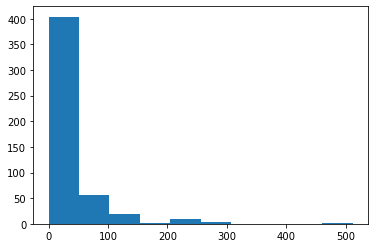

In [41]:
plt.hist(train['fare'])
plt.show()

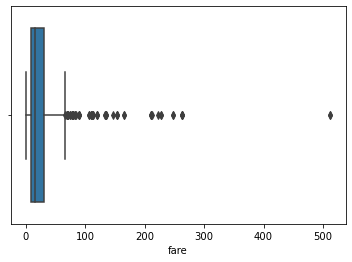

In [42]:
sns.boxplot(data=train, x='fare')
plt.show()

In [43]:
train['fare'].describe()

count    498.000000
mean      34.345013
std       54.116433
min        0.000000
25%        7.895800
50%       14.458300
75%       31.275000
max      512.329200
Name: fare, dtype: float64

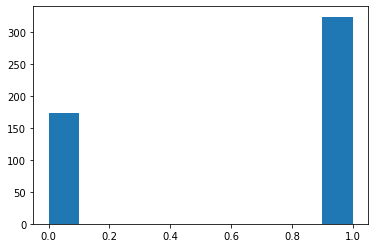

In [44]:
# what about for categorical?
plt.hist(train['sex_male'])
plt.show()

<AxesSubplot:xlabel='sex_male', ylabel='count'>

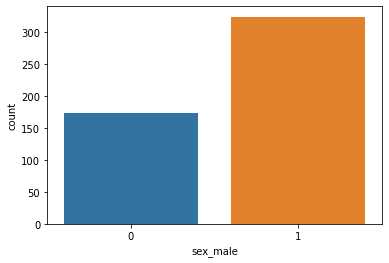

In [45]:
sns.countplot(data=train, x='sex_male')

In [46]:
pd.concat([train['sex_male'].value_counts(),
    train['sex_male'].value_counts(normalize=True)],
         axis=1)

,sex_male,sex_male
1,324,0.650602
0,174,0.349398


In [52]:
print(pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))

   embark_town_Southampton  embark_town_Southampton
1                      360                 0.722892
0                      138                 0.277108


Univariate assessment of feature survived:


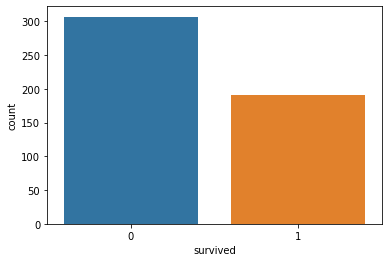

   survived  survived
0       307  0.616466
1       191  0.383534
------------------------------
------------------------------
Univariate assessment of feature pclass:


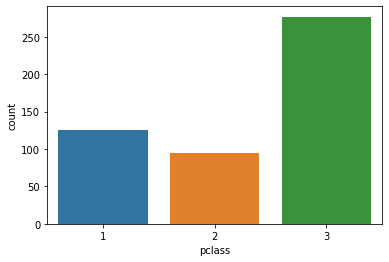

   pclass    pclass
3     277  0.556225
1     126  0.253012
2      95  0.190763
------------------------------
------------------------------
Univariate assessment of feature sex:


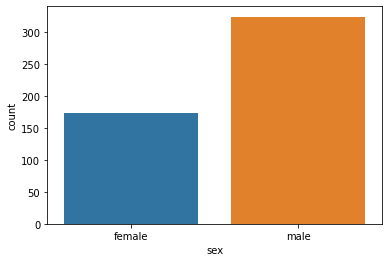

        sex       sex
male    324  0.650602
female  174  0.349398
------------------------------
------------------------------
Univariate assessment of feature sibsp:


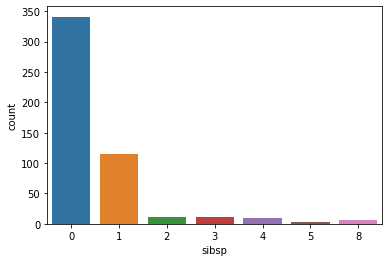

   sibsp     sibsp
0    341  0.684739
1    115  0.230924
2     12  0.024096
3     11  0.022088
4     10  0.020080
8      6  0.012048
5      3  0.006024
------------------------------
------------------------------
Univariate assessment of feature parch:


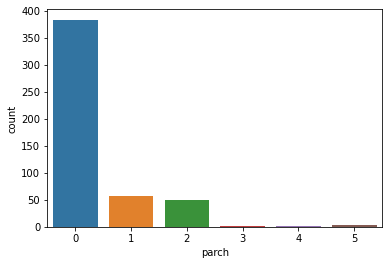

   parch     parch
0    383  0.769076
1     57  0.114458
2     50  0.100402
5      4  0.008032
3      2  0.004016
4      2  0.004016
------------------------------
------------------------------
Univariate assessment of feature embark_town:


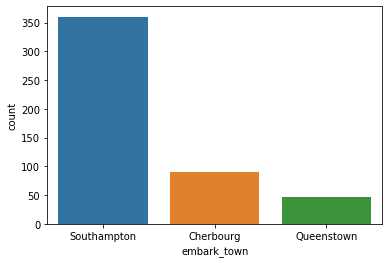

             embark_town  embark_town
Southampton          360     0.722892
Cherbourg             91     0.182731
Queenstown            47     0.094378
------------------------------
------------------------------
Univariate assessment of feature alone:


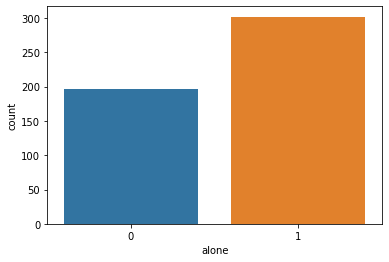

   alone     alone
1    302  0.606426
0    196  0.393574
------------------------------
------------------------------
Univariate assessment of feature sex_male:


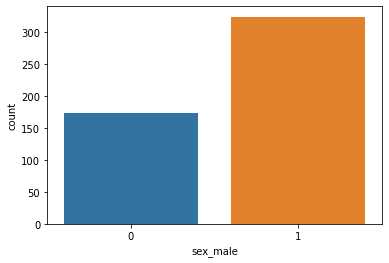

   sex_male  sex_male
1       324  0.650602
0       174  0.349398
------------------------------
------------------------------
Univariate Feature analysis of feature age:


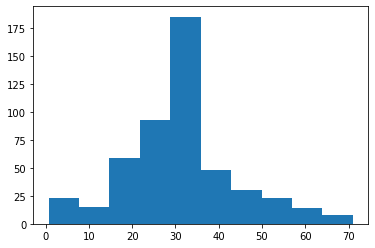

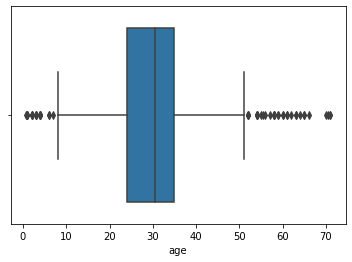

------------------------------
------------------------------
Univariate Feature analysis of feature fare:


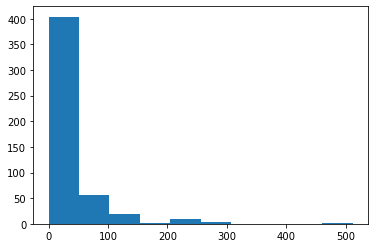

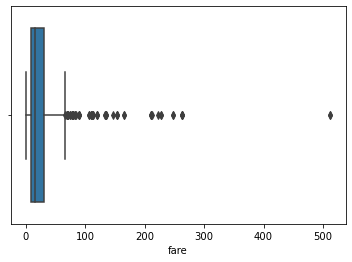

------------------------------
------------------------------


In [53]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=train, x=col)
        plt.show()
        print(
            pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(train[col])
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.show()
        train[col].describe()
    print('------------------------------')
    print('------------------------------')

In [55]:
# Initial takeaways on univariate analysis:
# We have a fairly normal dist. on age
# likely enough normality to assess age with a parametric test
# maybe not so much on fare, which seems heavily skewed
# we may want to address the fare outliers on a further run after mvp
# we may want to on a second run combine some of the categories
# like sibsp or parch in order to reduce the number
# of categories that we have encoded presently
# these ones have some values with low n counts
# that will likely not prove exceptionally generalizable
# due to their low numbers

In [56]:
# bivariate and multivariate analysis:

In [57]:
# think about what type of visualizations we
# want to create for the type of conclusions
# that we wish to draw:
# we know that our target in this analytical instance
# is survival on the titanic,
# and this is going to frame a lot of the analysis
# we do on interactions with said target

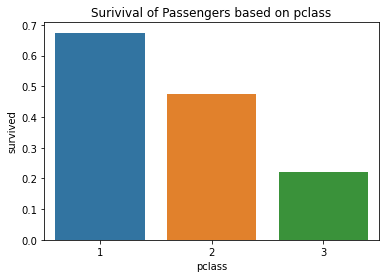

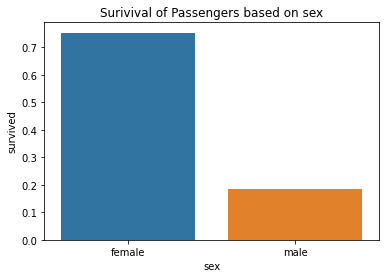

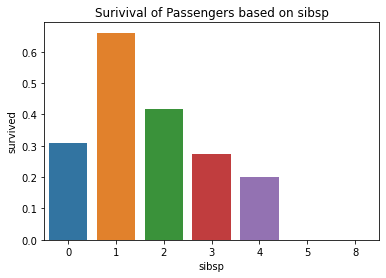

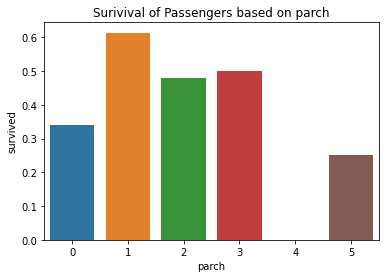

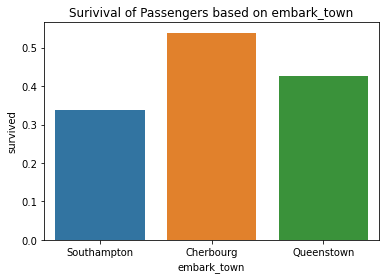

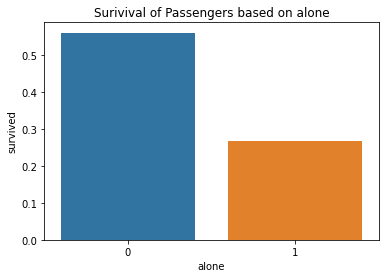

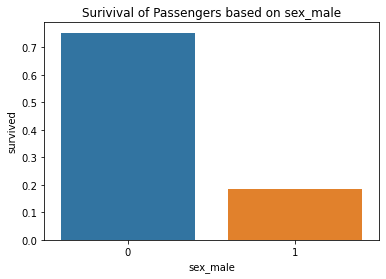

In [61]:
for col in cat_cols:
    if col != 'survived':
        sns.barplot(data=train,
                    x=col,
                    y = 'survived',
                   ci=False)
        plt.title(f'Surivival of Passengers based on {col}')
        plt.show()

In [62]:
# takeaways here:
# it looks like first and second class passengers had
# a better shot at survivival, as did women
# the most survivors had a 1 in the sibsp category, so perhaps women that survived
# were taking their husbands, or siblings with them
# parents and children were a bit more uniform, so
# it may not have been as impactful for entire families to exit

In [66]:
def bin_vals(val):
    if val == 0:
        return 0
    elif val == 1:
        return 1
    else:
        return 2

In [68]:
train['sibsp'].apply(bin_vals).value_counts()

0    341
1    115
2     42
Name: sibsp, dtype: int64

In [69]:
train['sibsp_custom'] = train['sibsp'].apply(bin_vals)

In [63]:
# Is survival (a categorical variable)
# Different across sibsp values(categorical)
# categorical vs a categorical:
# chi-squared

H$_0$: There is no proportional difference in the survival of passengers based on the category of sibsp

H$_a$: There is a proporportional difference in the distribution of sibsp to survival

In [ ]:
# CL: 0.95
α= 0.05

In [70]:
observed = pd.crosstab(train['sibsp_custom'], train['survived'])
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [71]:
chi2

49.41469255838372

In [72]:
p

1.860954901226051e-11

In [ ]:
# we can reject the null hypothesis and suggest there is a different proportional difference
# in the groups of sibsp passengers

In [ ]:
# what if we interpret sibsp as a continuous value?

In [65]:
train['sibsp'].value_counts()

0    341
1    115
2     12
3     11
4     10
8      6
5      3
Name: sibsp, dtype: int64

In [75]:
survived_sibsp = train[train.survived==1].sibsp
died_sibsp = train[train.survived==0].sibsp

In [77]:
# h0: there is no difference in the mean of sibsp between those 
# that survived and those that did not survive
# ha: there is a difference in the mean of sibsp between those 
# that survived and those that did not survive
t_stat, p = stats.ttest_ind(survived_sibsp, died_sibsp)
# we fail to reject the null hypothesis here
p

0.8510383973415218

In [78]:
# following through with this process, we will
# examine the differences in these features against survival,
# using statistical testing to back up the conslusions
# that we draw visually from the information

In [79]:
# we will continue forward and make notes of which are most consequential

<AxesSubplot:xlabel='survived', ylabel='fare'>

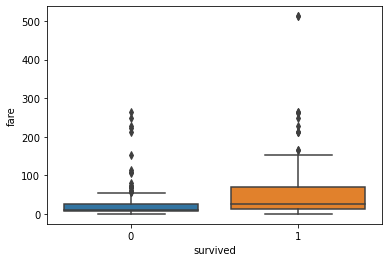

In [83]:
# for the continuous variables:
sns.boxplot(data=train, y='fare',x='survived')

<AxesSubplot:xlabel='survived', ylabel='fare'>

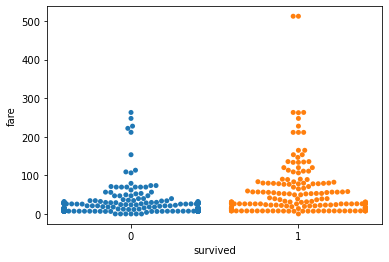

In [84]:
sns.swarmplot(data=train, x='survived', y='fare')

In [85]:
# fare is unquestionably a continuous variable
# let's do a quick t-test to establish that this is likely
# not one of our biggest drivers

H$_0$: There is no difference in the means of fare for survived and non survived passengers

H$_a$: There is a difference in the means of fare for survived and non survived passengers

(array([404.,  57.,  20.,   2.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

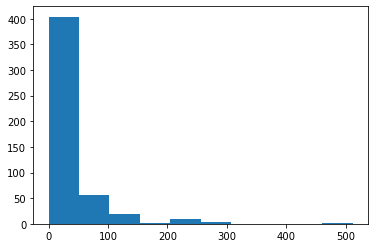

In [89]:
plt.hist(train['fare'])

In [86]:
survived_fares = train[train.survived==1].fare
died_fares = train[train.survived==0].fare

In [ ]:
# fare is less normal than age,
# maybe we want to go for a non parametric test
# stats.mannwhitneyu(

In [91]:
α = 0.05

In [92]:
stat, p = stats.mannwhitneyu(survived_fares, died_fares)
if p < α:
    print('we can reject the null hypothesis!')
    print(f'p value: {p}')
else:
    print('we fail to reject the null hypothesis!')
    print(f'p value: {p}')

we can reject the null hypothesis!
p value: 1.3383707559824992e-17


In [93]:
# we can actually say that there is a rejection that 
# there is not an equivalent mean here!
# There is however not a ton of visual evidence to say
# that this is going to be an especially significant driver
# of the target of surivival based on
# what we saw with our box and swarm plots

### Multivariate analysis

<AxesSubplot:xlabel='age', ylabel='sex'>

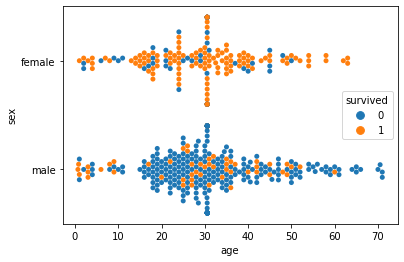

In [95]:
sns.swarmplot(data=train,
              x= 'age',
              y= 'sex',
              hue='survived')

<AxesSubplot:xlabel='age', ylabel='sex'>

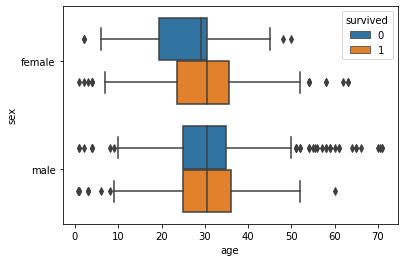

In [97]:
sns.boxplot(data=train,
              x= 'age',
              y= 'sex',
              hue='survived')

In [96]:
train.sex.value_counts()

male      324
female    174
Name: sex, dtype: int64

In [98]:
# initial visual takeways:
# it appears that there is a difference in age of women that surived versus
# women that perished

older_women vs younger women:
is there a difference in the mean age of women that
surived versus women that did not survive:

H$_0$: The average age of women that surived is less than or equal the age of women that did not survive

H$_a$: The average age of women that survived is greater than the average age of women that did not survive

In [100]:
train.sex.unique()

array(['female', 'male'], dtype=object)

In [102]:
train[(train.sex == 'female') & (train.survived == 1)].age

573    30.53944
540    36.00000
393    23.00000
184     4.00000
496    54.00000
         ...   
309    30.00000
483    63.00000
651    18.00000
25     38.00000
727    30.53944
Name: age, Length: 131, dtype: float64

In [103]:
alive_girls_age = train[(train.sex == 'female') & (train.survived == 1)].age
dead_girls_age = train[(train.sex == 'female') & (train.survived == 0)].age

In [104]:
# parameters:
# age looks pretty normal
# levene test for equal variance:
# h0: women that survived's age has equal variance to women 
# that did not survive age
# ha: women that survived age has inequal variance to women 
# that did not survive
stats.levene(alive_girls_age, dead_girls_age)

LeveneResult(statistic=0.0021039552347499233, pvalue=0.9634679605397489)

In [105]:
# high p value, fail to reject null, presume equal variance

In [106]:
t_stat, p = stats.ttest_ind(alive_girls_age, dead_girls_age)
if (t_stat > 0) and (p < α):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [107]:
p

0.13636812881149415